In [1]:
print("Hello world!")

Hello world!


In [2]:
import os
import tarfile
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
# Constants
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Functions
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [4]:
# Get and load data
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


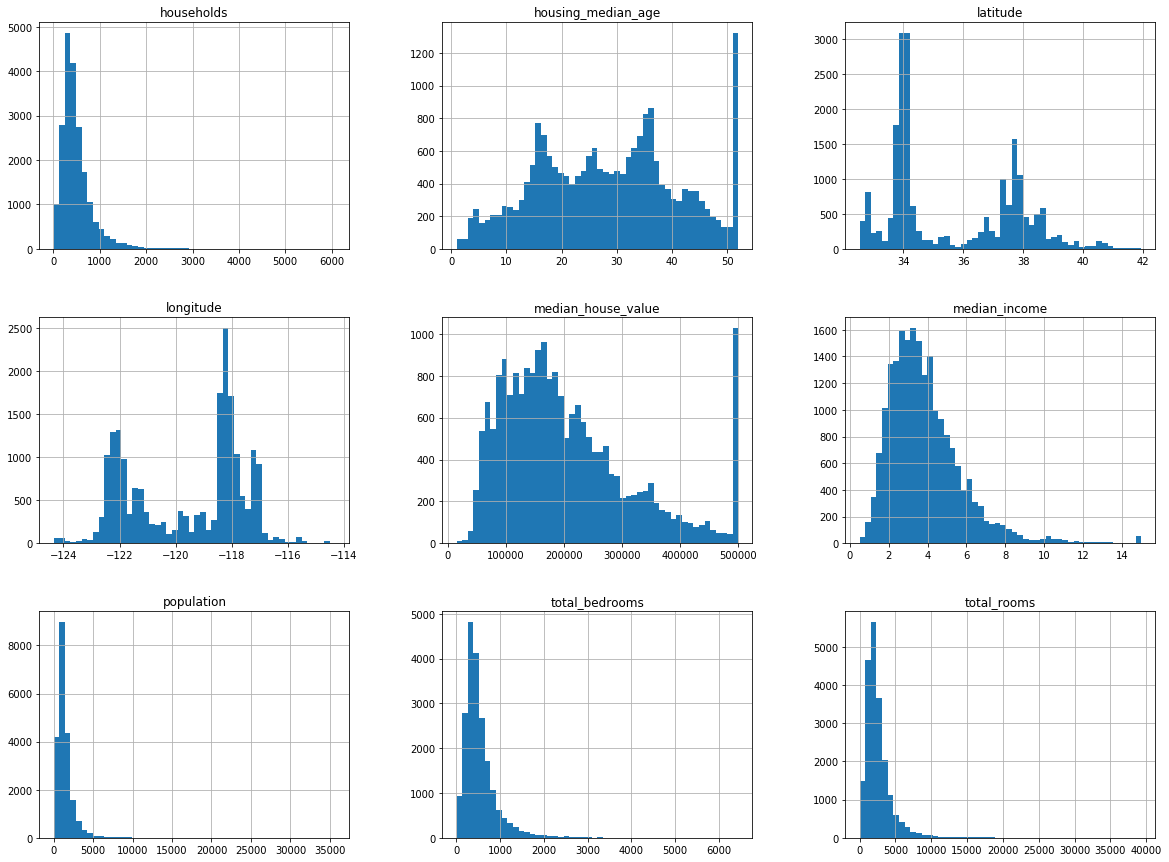

In [8]:
%matplotlib inline
# Magic. Matplotlib needs to know where to render.
# This tells it to do it right here, 'inline' in the notebook.

housing.hist(bins=50, figsize=(20,15))
plt.show()

### Notes
- `median_income` is *roughly* in tens of thousands of USD, but is capped at each end to a min of 0.4999 and max of 15.0001
- `housing_median_age` is capped with a max value of 52
- `median_house_value` is capped with a max value of 500001
- Wide spread in scales for features
- Lots of right-skewed features

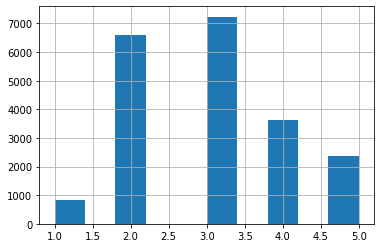

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

In [10]:
# Stratified Shuffle Split from SKL
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Method .split generates the indices of the split
# Can generate multiple splits, e.g. for K-fold cross-validation, but here just one (train-test split)

loop_count = 0
for train_index, test_index in split.split(housing, housing["income_cat"]):  # split.split() is a generator, index outputs *must* be iterated over
    loop_count = loop_count + 1
    print("Loop count: ", loop_count)
    print("Train index: ", train_index)
    print("Test index: ", test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    print("---")
    
pd.DataFrame({"Test_set": strat_test_set["income_cat"].value_counts() / len(strat_test_set),
              "Orig_data": housing["income_cat"].value_counts() / len(housing)})

Loop count:  1
Train index:  [17606 18632 14650 ... 13908 11159 15775]
Test index:  [ 5241 10970 20351 ...  4019 12107  2398]
---


,Test_set,Orig_data
3,0.350533,0.350581
2,0.318798,0.318847
4,0.176357,0.176308
5,0.114583,0.114438
1,0.039729,0.039826


In [11]:
print(housing.info(), "\n")
print(strat_train_set.info(), "\n")
print(strat_test_set.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  -

In [12]:
# Need to drop the income_cat class--not using it anymore, and should get data back to original state
for set_ in (housing, strat_train_set, strat_test_set):  # Iterates over each of the three data frames in the tupile
    set_.drop("income_cat", axis=1, inplace=True)

In [13]:
print(housing.info(), "\n")
print(strat_train_set.info(), "\n")
print(strat_test_set.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 no

## Get clean copy of the training set then start EDA

In [14]:
housing = strat_train_set.copy()

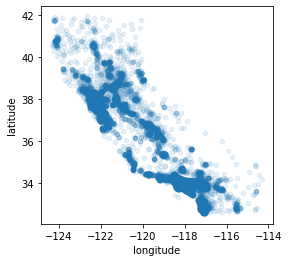

In [15]:
%matplotlib inline
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.gca().set_aspect("equal")
plt.show()

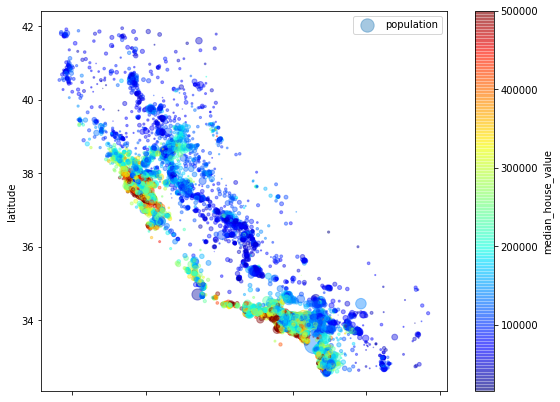

In [16]:
%matplotlib inline
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
            )
plt.gca().set_aspect("equal")
plt.legend()
plt.show()

### Correlations

In [17]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99f9f20d60>,
      dtype=object)

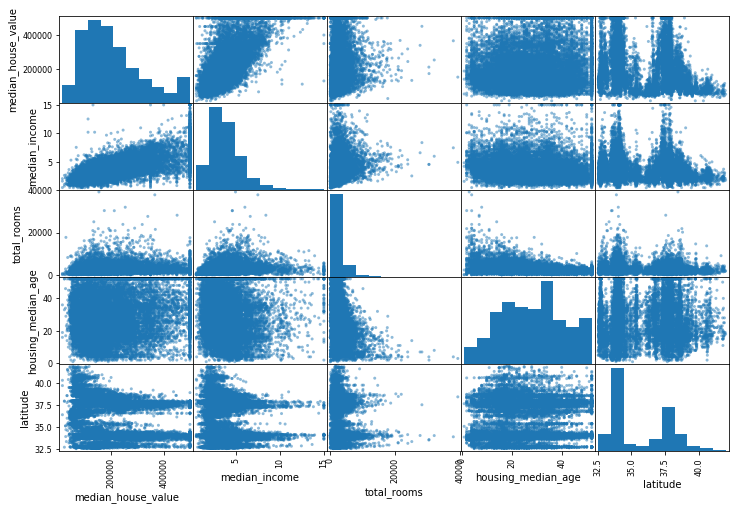

In [18]:
from pandas.plotting import scatter_matrix

# Plotting all numerical features vs all other numerical features is 11 x 11 matrix
# Instead choosing numerical features with highest correlation to the label
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]

scatter_matrix(housing[attributes], figsize=(12, 8))

#### Notes
- Strong correlation with median_income
- Total rooms seems to matter
- Age is quite noisy, as is latitude

Be good to move from total rooms to rooms per house

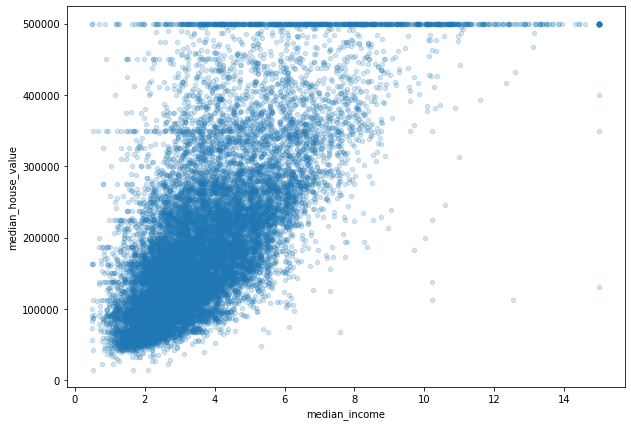

In [19]:
# Zooming in on median_income
housing.plot(x="median_income", y="median_house_value", kind="scatter", alpha=0.2, figsize=(10, 7))

- Clear strong linear correlation, not too much dispersion
- Can see horizontal lines at various values of median house value (the label), some stronger than others
- Quite a few outliers, might need to trim ...
- Strong cluser in the middle

## Feature engineering

In [20]:
housing.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [21]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [23]:
abs(corr_matrix["median_house_value"]).sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
bedrooms_per_room           0.259984
rooms_per_household         0.146285
latitude                    0.142724
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
longitude                   0.047432
population                  0.026920
population_per_household    0.021985
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99fa1385b0>,
      dtype=object)

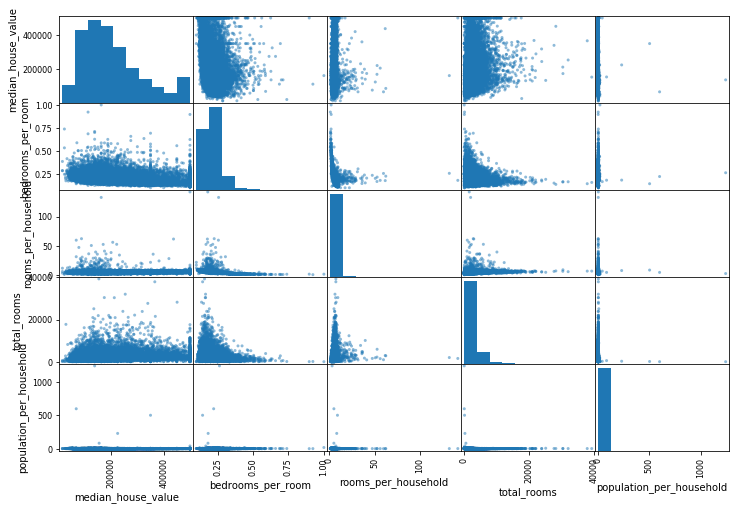

In [24]:
attributes = ["median_house_value", "bedrooms_per_room", "rooms_per_household", "total_rooms", "population_per_household"]

scatter_matrix(housing[attributes], figsize=(12, 8))

- Some clear outliers here

## Data prep and cleaning for ML

In [25]:
# Clean training set, labels separated
housing = strat_train_set.copy()
housing = housing.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Impute missing values
Using the median for numerical variables

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Median imputation only works on numerical values. Remove the categorical variable before applying.

In [27]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [28]:
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [29]:
X = imputer.transform(housing_num)  # Returns a NumPy array/matrix that needs to be re-inserted into a DataFrame
X[:10]

array([[-1.2189e+02,  3.7290e+01,  3.8000e+01,  1.5680e+03,  3.5100e+02,
         7.1000e+02,  3.3900e+02,  2.7042e+00],
       [-1.2193e+02,  3.7050e+01,  1.4000e+01,  6.7900e+02,  1.0800e+02,
         3.0600e+02,  1.1300e+02,  6.4214e+00],
       [-1.1720e+02,  3.2770e+01,  3.1000e+01,  1.9520e+03,  4.7100e+02,
         9.3600e+02,  4.6200e+02,  2.8621e+00],
       [-1.1961e+02,  3.6310e+01,  2.5000e+01,  1.8470e+03,  3.7100e+02,
         1.4600e+03,  3.5300e+02,  1.8839e+00],
       [-1.1859e+02,  3.4230e+01,  1.7000e+01,  6.5920e+03,  1.5250e+03,
         4.4590e+03,  1.4630e+03,  3.0347e+00],
       [-1.2097e+02,  3.7660e+01,  2.4000e+01,  2.9300e+03,  5.8800e+02,
         1.4480e+03,  5.7000e+02,  3.5395e+00],
       [-1.1850e+02,  3.4040e+01,  5.2000e+01,  2.2330e+03,  3.1700e+02,
         7.6900e+02,  2.7700e+02,  8.3839e+00],
       [-1.1724e+02,  3.4150e+01,  2.6000e+01,  2.0410e+03,  2.9300e+02,
         9.3600e+02,  3.7500e+02,  6.0000e+00],
       [-1.1826e+02,  3.3990e+01

In [30]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)  # doesn't yet include the categorical feature, `ocean_proximity`

In [31]:
housing_tr.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


#### Textual/categorical feature
Only one in this project: `ocean_proximity`.

In [32]:
housing_cat = housing[["ocean_proximity"]]  # Selects list of columns (in this case, list of just one element), result is a DataFrame
# housing["ocean_proximity"].head(10)  # Pulls a single column, result is a Series

housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [33]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

Categorical, but have a natural ordering to them: How close they are to the ocean.

SKL has a preprocessing transformer class for encoding these. There are also classes for One Hot Encoding, etc.

In [34]:
housing["ocean_proximity"].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[["ISLAND", "NEAR OCEAN", "NEAR BAY", "<1H OCEAN", "INLAND"]])
housing_cat_enc = ordinal_encoder.fit_transform(housing_cat)

housing_cat_enc[:10]  # Returns a NumPy array that needs to be re-inserted into a DataFrame

array([[3.],
       [3.],
       [1.],
       [4.],
       [3.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.]])

Book uses one hot encoding after trying the ordinal encoding. Claims ordinal doesn't make sense for this application, but then they didn't pass a `categories` variable. We'll switch to match the book.

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)  # Returns a sparse matrix type, considering many zeros in one hot enc
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot[:10].toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

What are the categories, and in what order? Check the `categories_` variable of the encoder, which is a transformer (which also makes it an estimator).

In [38]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Custom trasformer: Adding features/attributes from the EDA

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6  # Column indexes of these features

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # Doesn't need to do anything else, doesn't "train" off data, but does need to return identity to meet requirements of fit method
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]  # Concatenates into a numpy matrix
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [40]:
housing.head(10)  # Pandas DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [41]:
housing.values  # NumPy array/matrix extracted from the DataFrame. Values only, preserving the order of indexes and columns.

array([[-121.89, 37.29, 38.0, ..., 339.0, 2.7042, '<1H OCEAN'],
       [-121.93, 37.05, 14.0, ..., 113.0, 6.4214, '<1H OCEAN'],
       [-117.2, 32.77, 31.0, ..., 462.0, 2.8621, 'NEAR OCEAN'],
       ...,
       [-116.4, 34.09, 9.0, ..., 765.0, 3.2723, 'INLAND'],
       [-118.01, 33.82, 31.0, ..., 356.0, 4.0625, '<1H OCEAN'],
       [-122.45, 37.77, 52.0, ..., 639.0, 3.575, 'NEAR BAY']],
      dtype=object)

In [42]:
att_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs = att_adder.transform(housing)  # Won't work, since this is a Pandas DataFrame. SKL estimators, transformers, predictors (and custom versions) work on NumPy arrays. Need values only.
housing_extra_attribs = att_adder.transform(housing.values)

housing_extra_attribs[:10]  # NumPy array output from custom transformer. Note the two additional columns for `rooms_per_houshold` and `population_per_household`, but no `bedrooms_per_room` since that was False

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 4.225108225108225, 2.0259740259740258],
       [-119.61, 36.31, 25.0, 1847.0, 371.0, 1460.0, 353.0, 1.8839,
        'INLAND', 5.232294617563739, 4.135977337110481],
       [-118.59, 34.23, 17.0, 6592.0, 1525.0, 4459.0, 1463.0, 3.0347,
        '<1H OCEAN', 4.50580997949419, 3.047846889952153],
       [-120.97, 37.66, 24.0, 2930.0, 588.0, 1448.0, 570.0, 3.5395,
        'INLAND', 5.140350877192983, 2.5403508771929824],
       [-118.5, 34.04, 52.0, 2233.0, 317.0, 769.0, 277.0, 8.3839,
        '<1H OCEAN', 8.061371841155236, 2.776173285198556],
       [-117.24, 34.15, 26.0, 2041.0, 293.0, 936.0, 375.0, 6.0, 'INLAND',
        5.442666666666667, 2.496],
   

#### Create a pipeline of our transformations, including scaling
We'll use minmax scaling (normalisation) with the `StandardScaler` class from SKL

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)  # Can take a DataFrame input because first transformer, `SimpleImputer`, accepts a DataFrame on its `fit` and `transform` methods
                                                          # Can call `fit_transform` because last estimator is a transformer, `StandardScaler`, and so has a `transform` method

print(housing_num.columns)
housing_num_tr[:10]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


array([[-1.15604281e+00,  7.71949616e-01,  7.43330892e-01,
        -4.93233934e-01, -4.45438207e-01, -6.36211407e-01,
        -4.20698422e-01, -6.14937444e-01, -3.12054519e-01,
        -8.64987054e-02,  1.55317530e-01],
       [-1.17602483e+00,  6.59694795e-01, -1.16531720e+00,
        -9.08966554e-01, -1.03692780e+00, -9.98331347e-01,
        -1.02222705e+00,  1.33645936e+00,  2.17683377e-01,
        -3.35339129e-02, -8.36289016e-01],
       [ 1.18684903e+00, -1.34218285e+00,  1.86641864e-01,
        -3.13659889e-01, -1.53344583e-01, -4.33639362e-01,
        -9.33177983e-02, -5.32045602e-01, -4.65315160e-01,
        -9.24049941e-02,  4.22200402e-01],
       [-1.70676728e-02,  3.13575763e-01, -2.90520160e-01,
        -3.62762167e-01, -3.96755937e-01,  3.60409561e-02,
        -3.83435587e-01, -1.04556555e+00, -7.96612428e-02,
         8.97356110e-02, -1.96453142e-01],
       [ 4.92473835e-01, -6.59299356e-01, -9.26736191e-01,
         1.85619316e+00,  2.41221109e+00,  2.72415407e+00,
  

#### Full pipeline of all combined transformations
Includes numeric **and** categorical transformers

In [44]:
from sklearn.compose import ColumnTransformer

num_attributes = list(housing_num)  # Using list here gets a list of column names from the DataFrame. Alternatively use `.columns.to_list()`, see cell below for example.
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attribs),  # Note that you can end the list of transformers with a comma, very helpful!
])

In [45]:
housing_num.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

**Applying the complete and full pipeline, making the data ready for modelling**

In [46]:
housing_prepared = full_pipeline.fit_transform(housing)

## Modelling/Training

#### Linear regression

In [61]:
print(type(housing_prepared))
print(housing_prepared.shape)
housing_prepared

<class 'numpy.ndarray'>
(16512, 16)


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [51]:
print(type(housing_labels))
housing_labels

<class 'pandas.core.series.Series'>


17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)  # Takes array-like objects as main X, y inputs, so DataFrames, Series, NumPy arrays are fine

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print(housing.columns)

print("Numerical prep pipeline adds 3 features, categorical prep pipleine adds 5 features to replace 1 features (one-hot enc). End up with 9 + 3 - 1 + 5 = 16 features, and 16 coefs.")

print(lin_reg.coef_)
print(lin_reg.rank_)
print(lin_reg.singular_)
print(lin_reg.intercept_)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')
Numerical prep pipeline adds 3 features, categorical prep pipleine adds 5 features to replace 1 features (one-hot enc). End up with 9 + 3 - 1 + 5 = 16 features, and 16 coefs.
[-55650.4116403  -56716.45236929  13732.83841856  -1933.1277138
   7330.04062103 -45708.26306673  45455.47519691  74714.39134154
   6605.12802802   1042.95709453   9249.75886697 -18016.52432168
 -55219.15208555 110357.78363967 -22479.84008184 -14642.2671506 ]
15
[2.54009704e+02 1.84889909e+02 1.73427226e+02 1.29368165e+02
 1.22778798e+02 1.08316602e+02 9.08848885e+01 6.47185253e+01
 5.43971022e+01 4.67816459e+01 3.87107712e+01 2.71494729e+01
 1.91800130e+01 1.59041115e+01 1.58026699e+00 1.33296239e-14]
236914.99732815975


Let's try it on some training observations

In [75]:
some_data = housing.iloc[:5]  # Top 5 rows of the DataFrame, ignoring the assigned index, just by position
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(f"Predictions: {list(lin_reg.predict(some_data_prepared).round(decimals=1))}")
print(f"Labels:      {list(some_labels)}")
print(f"R^2 on sample: {lin_reg.score(some_data_prepared, some_labels)}")

Predictions: [210644.6, 317768.8, 210956.4, 59219.0, 189747.6]
Labels:      [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]
R^2 on sample: 0.786255488457328


In [76]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [78]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Quite large. Let's try to build